In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
path = '/Users/francky/downloads/9781787284302_Code/data/HR-Employee-Attrition.xlsx'

employee = pd.read_excel(path, sheet_name=0, index_col='EmployeeNumber')


In [39]:
employee.shape

(1470, 34)

In [47]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1 to 2068
Data columns (total 15 columns):
Age                        1470 non-null int64
DailyRate                  1470 non-null int64
DistanceFromHome           1470 non-null int64
EnvironmentSatisfaction    1470 non-null int64
HourlyRate                 1470 non-null int64
JobInvolvement             1470 non-null int64
MonthlyIncome              1470 non-null int64
MonthlyRate                1470 non-null int64
Attrition                  1470 non-null object
BusinessTravel             1470 non-null object
Department                 1470 non-null object
EducationField             1470 non-null object
Gender                     1470 non-null object
JobRole                    1470 non-null object
MaritalStatus              1470 non-null object
dtypes: int64(8), object(7)
memory usage: 183.8+ KB


In [43]:
numerical_vars = ['Age','DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
                  'HourlyRate', 'JobInvolvement', 'MonthlyIncome', 'MonthlyRate']
categorical_vars = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 
                    'Gender', 'JobRole', 'MaritalStatus']


In [44]:
employee = employee[numerical_vars+categorical_vars]

In [51]:
employee.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,MonthlyIncome,MonthlyRate,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
EmployeeNumber,,,,,,,,,,,,,,,
1,41,1102,1,2,94,3,5993,19479,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
2,49,279,8,3,61,2,5130,24907,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
4,37,1373,2,4,92,2,2090,2396,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
5,33,1392,3,4,56,3,2909,23159,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
7,27,591,2,1,40,3,3468,16632,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married


In [48]:
employee.describe()


,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,MonthlyIncome,MonthlyRate
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.721769,65.891156,2.729932,6502.931293,14313.103401
std,9.135373,403.509100,8.106864,1.093082,20.329428,0.711561,4707.956783,7117.786044
min,18.000000,102.000000,1.000000,1.000000,30.000000,1.000000,1009.000000,2094.000000
25%,30.000000,465.000000,2.000000,2.000000,48.000000,2.000000,2911.000000,8047.000000
50%,36.000000,802.000000,7.000000,3.000000,66.000000,3.000000,4919.000000,14235.500000
75%,43.000000,1157.000000,14.000000,4.000000,83.750000,3.000000,8379.000000,20461.500000
max,60.000000,1499.000000,29.000000,4.000000,100.000000,4.000000,19999.000000,26999.000000


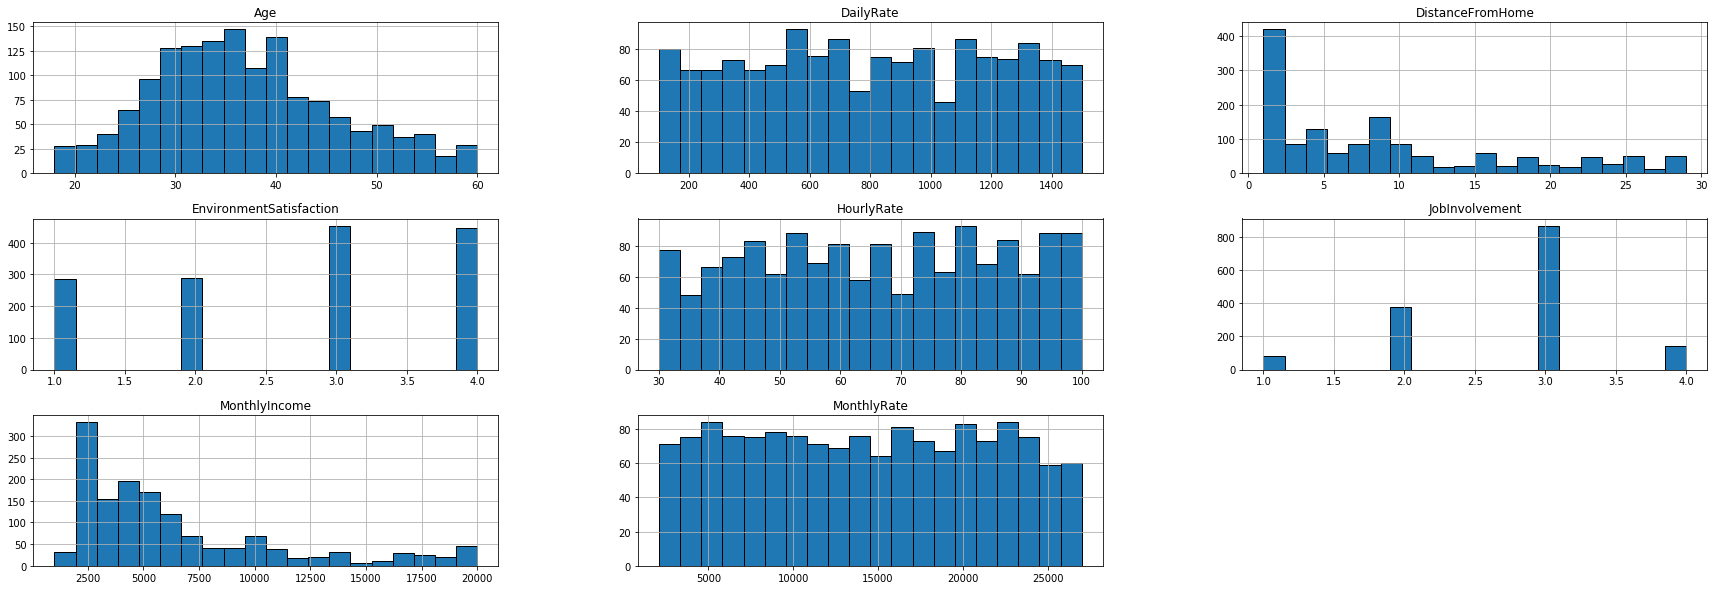

In [50]:
employee.hist(edgecolor='black', figsize=(30,10), bins=20);

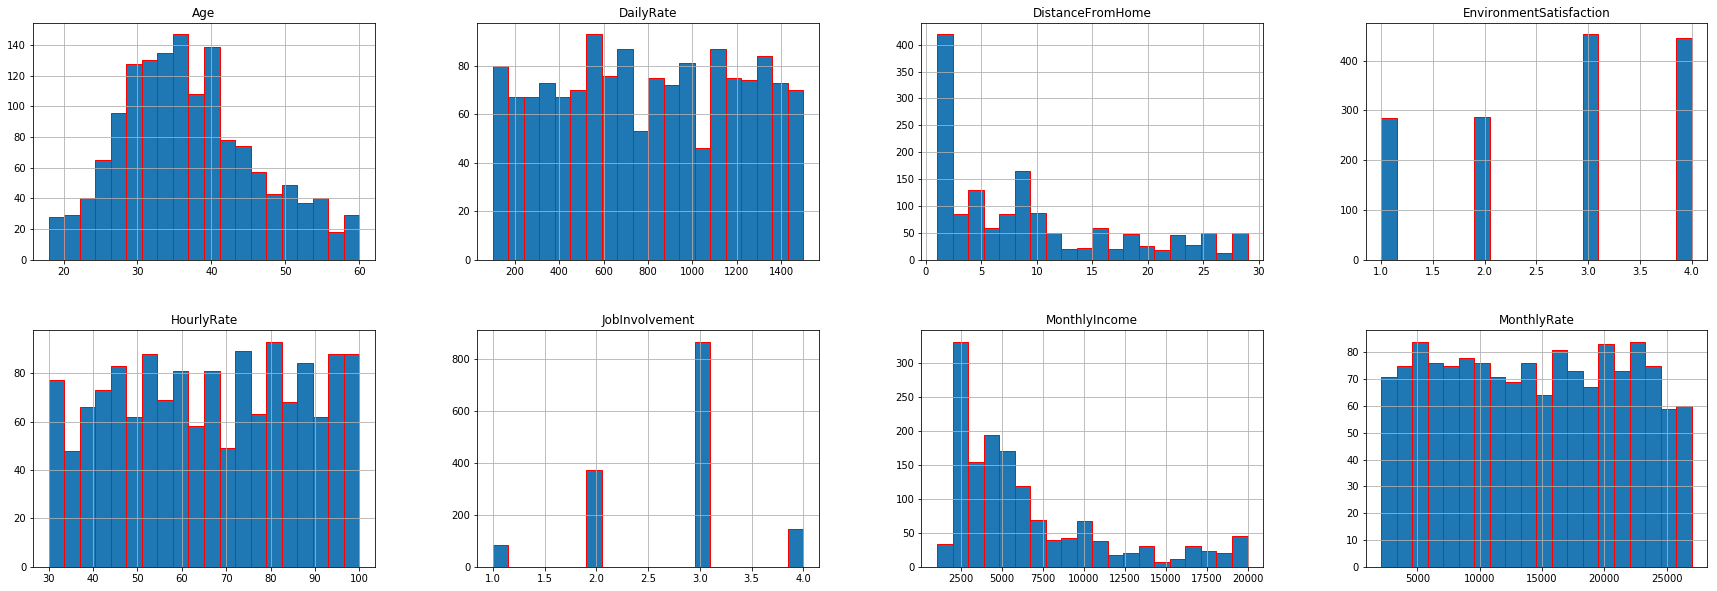

In [57]:
employee.hist(edgecolor='red', figsize=(30,10), bins=20, layout=(2,4));

In [58]:
employee.kurt()

Age                       -0.404145
DailyRate                 -1.203823
DistanceFromHome          -0.224833
EnvironmentSatisfaction   -1.202521
HourlyRate                -1.196398
JobInvolvement             0.270999
MonthlyIncome              1.005233
MonthlyRate               -1.214956
dtype: float64

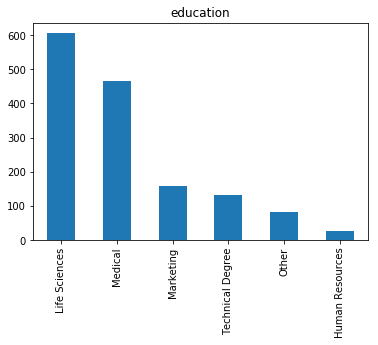

In [59]:
employee['EducationField'].value_counts().plot(kind='bar', title='education')

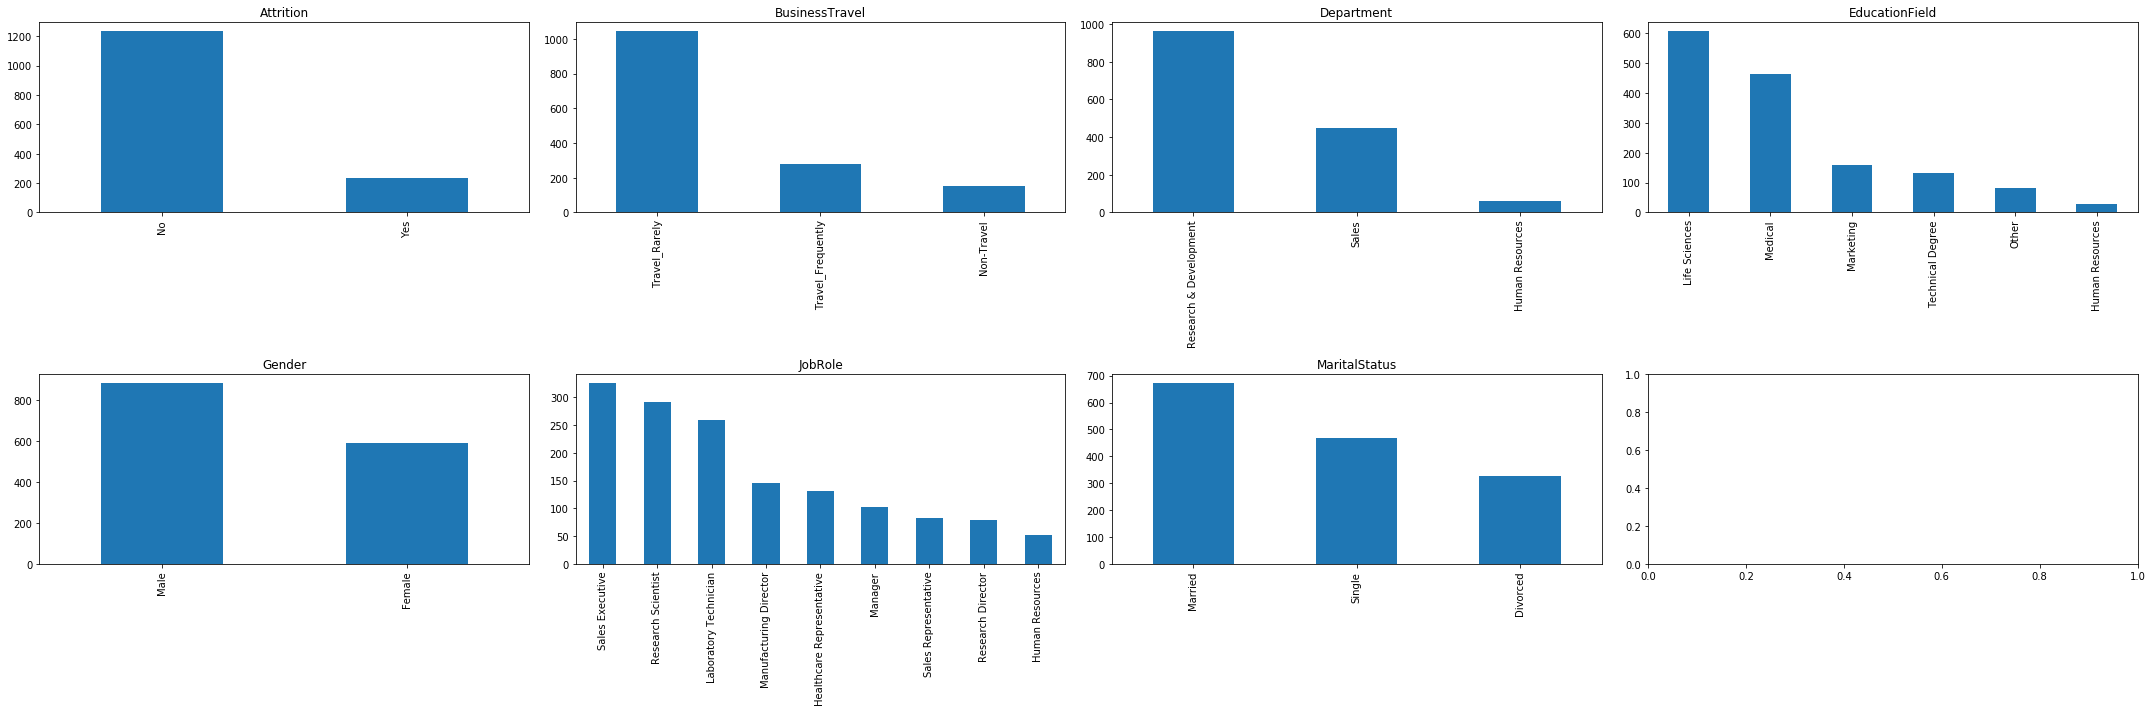

In [67]:
fig, ax = plt.subplots(2,4, figsize=(30,10))
for var, subplot in zip(categorical_vars, ax.flatten()):
    employee[var].value_counts().plot(kind='bar', ax=subplot, title= var)

fig.tight_layout()

In [69]:
def identify_above_30(series):
    counts = series.value_counts()
    return list(counts[counts>=30].index)

In [71]:
to_keep = employee[categorical_vars].apply(identify_above_30, axis=0)
to_keep

Attrition                                                 [No, Yes]
BusinessTravel       [Travel_Rarely, Travel_Frequently, Non-Travel]
Department         [Research & Development, Sales, Human Resources]
EducationField    [Life Sciences, Medical, Marketing, Technical ...
Gender                                               [Male, Female]
JobRole           [Sales Executive, Research Scientist, Laborato...
MaritalStatus                           [Married, Single, Divorced]
dtype: object

In [76]:
for var in categorical_vars:
    employee = employee.loc[employee[var].isin(to_keep[var])]
    
employee.shape

(1443, 15)

In [73]:
employee.shape

(1443, 15)

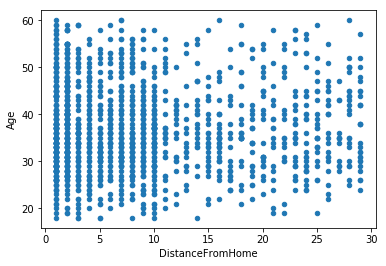

In [83]:
employee.plot.scatter(y='Age',x='DistanceFromHome')

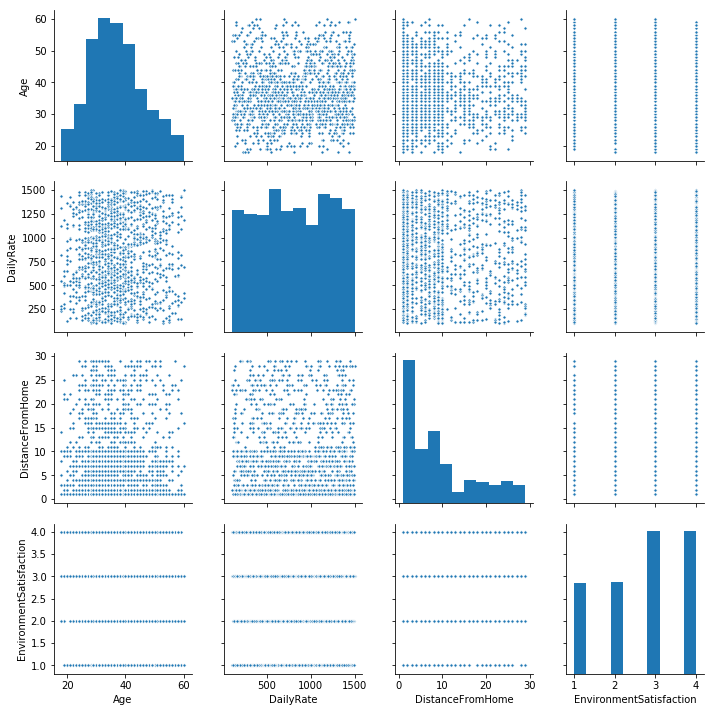

In [84]:
sns.pairplot(employee[numerical_vars[:4]], plot_kws={"s": 10});

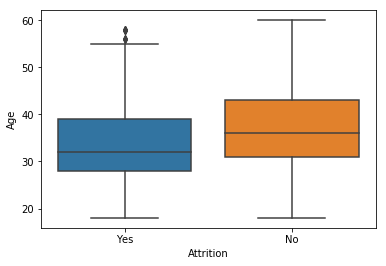

In [98]:
sns.boxplot(x="Attrition", y='Age', data=employee);

In [100]:
bb = pd.crosstab(employee['Attrition'], employee['Gender'])
bb

Gender,Female,Male
Attrition,,
No,496,717
Yes,84,146


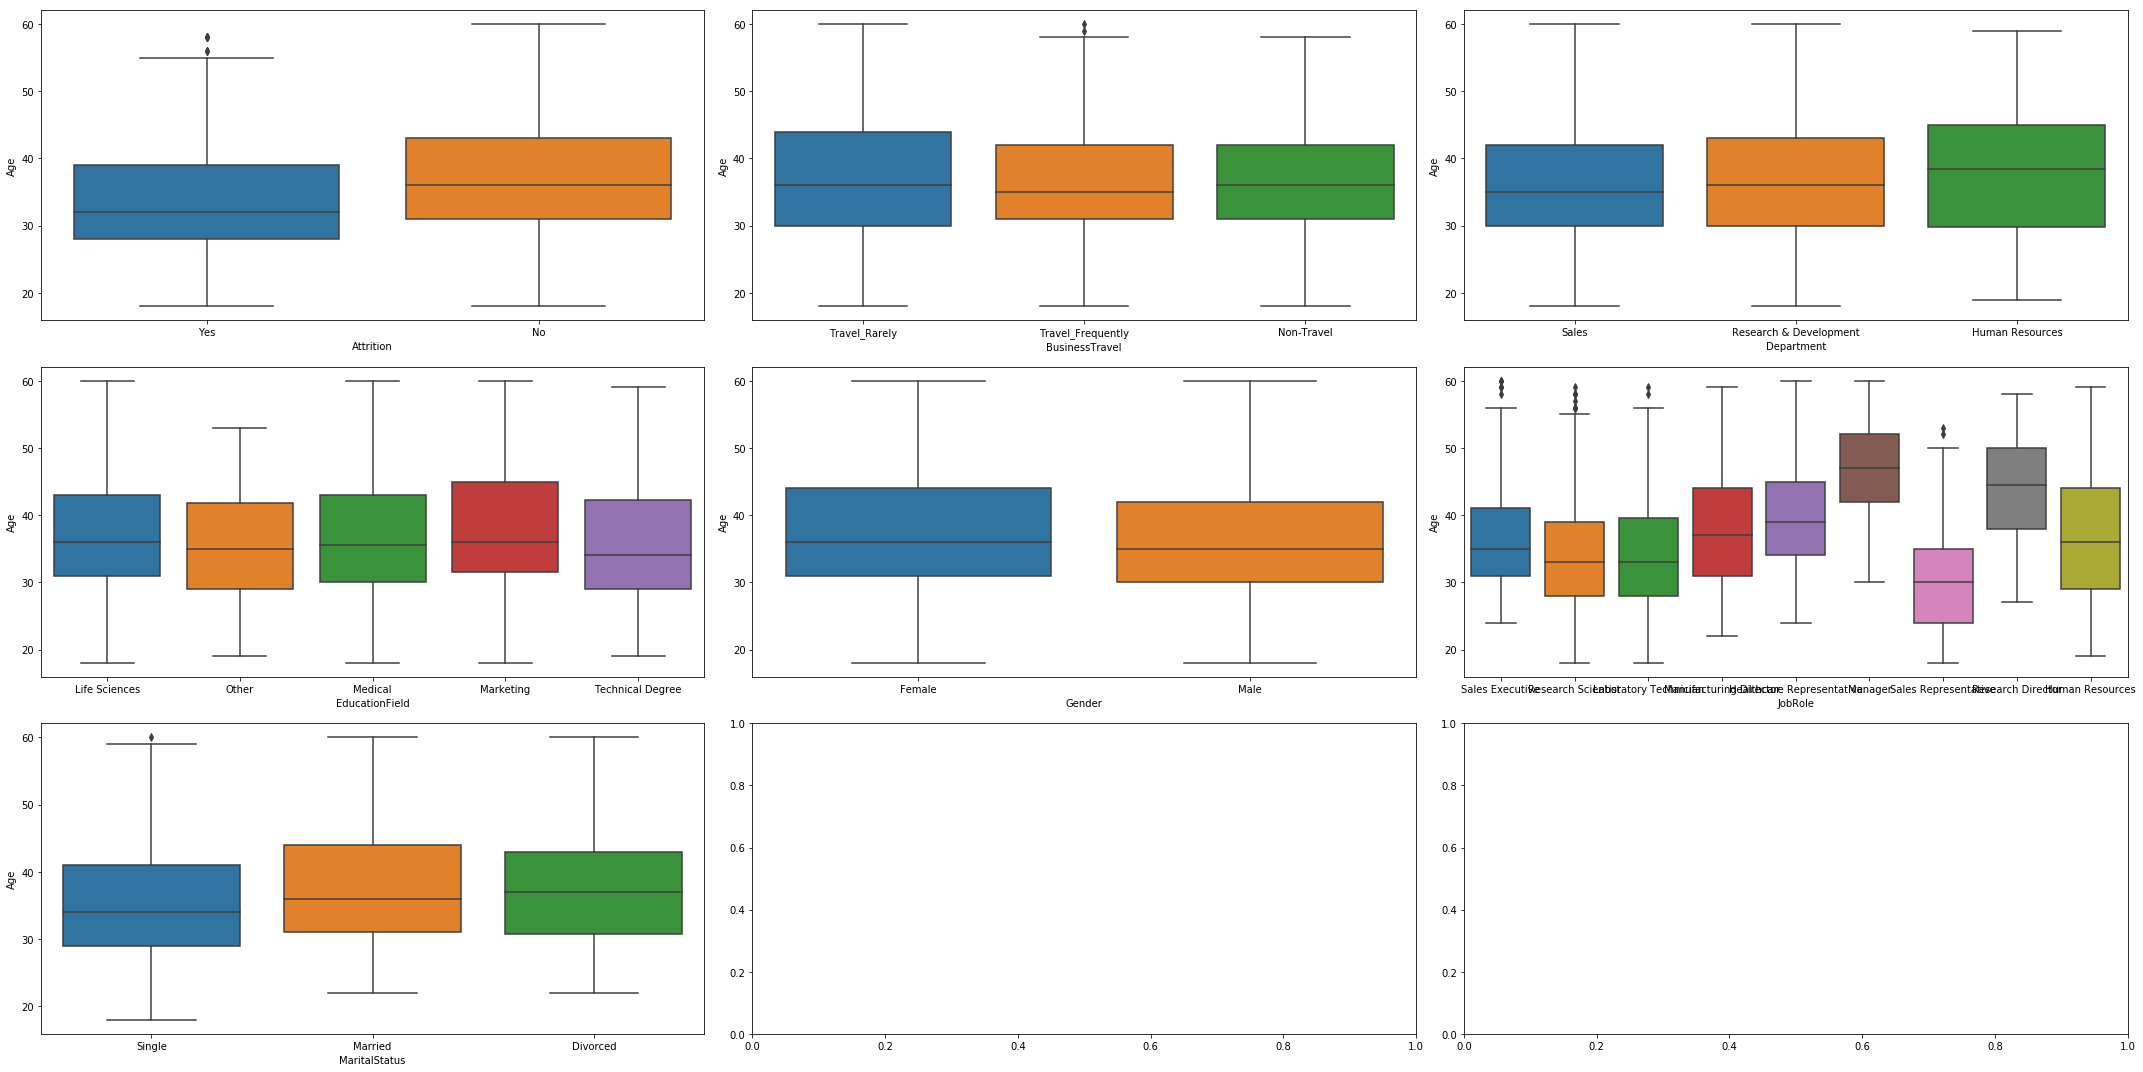

In [89]:
fig, ax = plt.subplots(3,3, figsize=(30,15))
for var, subplot in zip(categorical_vars, ax.flatten()):
    sns.boxplot(x=var, y='Age', data=employee, ax=subplot)

fig.tight_layout()

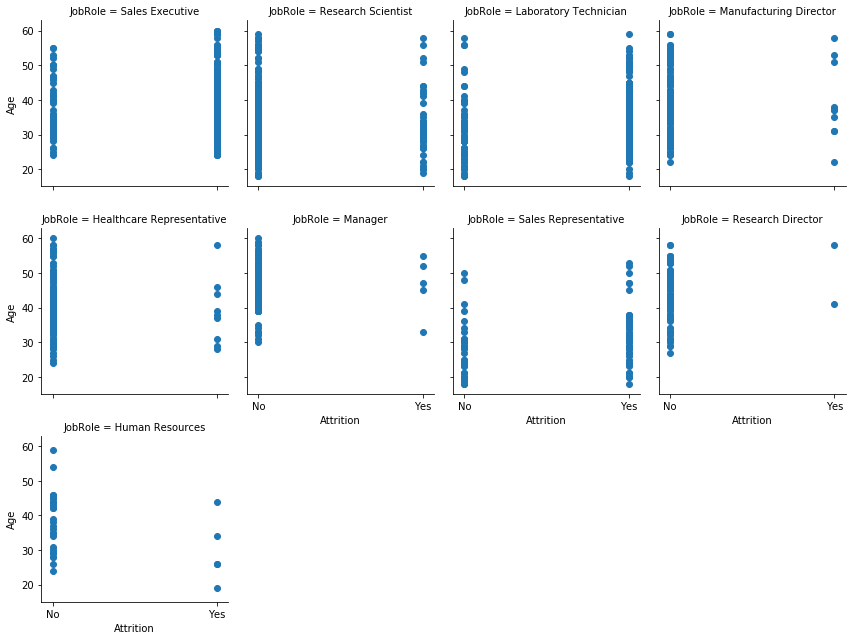

In [97]:
conditional = sns.FacetGrid(employee, col='JobRole', col_wrap=4)
conditional.map(plt.scatter, "Attrition", 'Age');

In [ ]:
rel = data['RelationshipSatisfaction']
# rel
# data['RelationshipSatisfaction'].head()
rel_maper={
    1: 'low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}

data['RelationshipSatisfaction']= rel.map(rel_maper)

data['RelationshipSatisfaction'].value_counts().plot(kind='bar', title='satisafaction')

In [ ]:
lowi = data['JobSatisfaction']# == 'low'
lowi.head()

In [ ]:
data['YearsInCurrentRole'].hist(edgecolor='black', bins=20)

In [ ]:
print(data['YearsInCurrentRole'].skew())
# print(data['DailyRate'].kurt())

In [ ]:
data[['YearsInCurrentRole','JobSatisfaction', 'Age']].describe()


In [ ]:
data[['YearsInCurrentRole','JobSatisfaction', 'Age']].hist(edgecolor='black', bins=20, figsize=(30,10), layout=(2,4));

In [ ]:
somelist= ['YearsInCurrentRole','JobSatisfaction', 'Age']
fig, ax = plt.subplots(2,4, figsize=(14, 7))
for var, subplot in zip(somelist, ax.flatten()):
    data[var].value_counts().plot(kind='bar', ax=subplot, title=var)
    
fig.tight_layout()

In [ ]:
data.plot.scatter(x='YearsInCurrentRole', y='Age');

In [ ]:
data['YearsInCurrentRole'].value_counts()#.plot(kind='bar')